In [31]:
#importing dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
#importing csv file and creating a pandas dataframe 
earthquake_file = '../Disasters/earthquakes.csv'
earthquake_df = pd.read_csv(earthquake_file)

#overview of created dataframe
earthquake_df.head()


,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,FOCAL_DEPTH,EQ_PRIMARY,...,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION
0,9925,Tsu,1900,1.0,10.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2566,NaN,1900,1.0,11.0,9.0,7.0,,NaN,7.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2567,NaN,1900,1.0,14.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0
3,2569,NaN,1900,1.0,20.0,6.0,33.0,30,10.0,7.4,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,2571,NaN,1900,5.0,16.0,20.0,12.0,,60.0,7.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#info function to list out all the columns for visability 
earthquake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3603 entries, 0 to 3602
Data columns (total 47 columns):
I_D                                   3603 non-null int64
FLAG_TSUNAMI                          998 non-null object
YEAR                                  3603 non-null int64
MONTH                                 3596 non-null float64
DAY                                   3591 non-null float64
HOUR                                  3410 non-null float64
MINUTE                                3381 non-null float64
SECOND                                3341 non-null object
FOCAL_DEPTH                           2884 non-null float64
EQ_PRIMARY                            3296 non-null float64
EQ_MAG_MW                             1184 non-null float64
EQ_MAG_MS                             2198 non-null float64
EQ_MAG_MB                             1783 non-null float64
EQ_MAG_ML                             159 non-null float64
EQ_MAG_MFA                            2 non-null float64
EQ_M

In [35]:
#creating bins
bins = [1899, 1909, 1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2018]

group_names = ["1900s", "1910s", "1920s", "1930s", "1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s" ]

earthquake_df["DECADE"] = pd.cut(earthquake_df["YEAR"], bins, labels=group_names)
earthquake_df.head()

,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,FOCAL_DEPTH,EQ_PRIMARY,...,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION,DECADE
0,9925,Tsu,1900,1.0,10.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900s
1,2566,NaN,1900,1.0,11.0,9.0,7.0,,NaN,7.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900s
2,2567,NaN,1900,1.0,14.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,1900s
3,2569,NaN,1900,1.0,20.0,6.0,33.0,30,10.0,7.4,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1900s
4,2571,NaN,1900,5.0,16.0,20.0,12.0,,60.0,7.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900s


(-1.1094781676067278, 1.168334572888612, -1.118924946063342, 1.191476621719089)

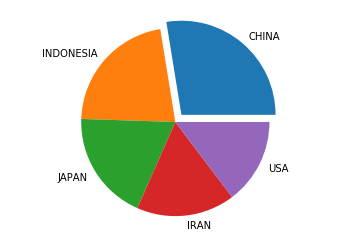

In [44]:
#top 10 countries with most earthquakes 
earthquake_count_country = earthquake_df['COUNTRY'].value_counts()
earthquake_country=earthquake_count_country.head()

piechart=pd.DataFrame({"Total Earthquakes": earthquake_country})
piechart
explode=[0.1,0,0,0,0]
plt.pie(piechart["Total Earthquakes"],labels=piechart.index,explode=explode)
plt.axis("equal")

In [59]:
#top 10 years with most earthquakes 
earthquake_count_year = earthquake_df['YEAR'].value_counts()
earthquake_count_year.head()

total_eqs = pd.DataFrame({"Years": earthquake_count_year.index, "Total EQs": earthquake_count_year}).reset_index()

del total_eqs["index"]
total_eqs.head()

,Years,Total EQs
0,2004,78
1,2008,77
2,2003,72
3,2007,67
4,2010,62


In [15]:
#top 5 months for most earthquakes 
earthquake_count_month = earthquake_df['MONTH'].value_counts()
earthquake_count_month.head(5)

11.0    328
8.0     320
1.0     311
5.0     309
4.0     308
Name: MONTH, dtype: int64

In [17]:
#top 10 earthquakes by magnitude 
earthquake_count_EQ = earthquake_df['EQ_PRIMARY'].value_counts()
earthquake_top = earthquake_df.sort_values(by='EQ_PRIMARY',ascending=False)
earthquake_top.head(10)

,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,FOCAL_DEPTH,EQ_PRIMARY,...,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION
1311,4227,Tsu,1960,5.0,22.0,19.0,11.0,17,33.0,9.5,...,NaN,NaN,3000.0,4.0,1000.000,4.0,58622.0,4.0,NaN,NaN
1423,4311,Tsu,1964,3.0,28.0,3.0,36.0,,33.0,9.2,...,NaN,NaN,NaN,NaN,400.000,4.0,NaN,3.0,NaN,NaN
3201,9799,Tsu,2011,3.0,11.0,5.0,46.0,24.1,30.0,9.1,...,NaN,NaN,6152.0,4.0,220085.456,4.0,127511.0,4.0,273796.0,4.0
2802,5823,Tsu,2004,12.0,26.0,0.0,58.0,53.4,30.0,9.1,...,NaN,NaN,NaN,3.0,10000.000,4.0,NaN,3.0,NaN,NaN
1127,4007,Tsu,1952,11.0,4.0,16.0,58.0,27.9,22.0,9.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
3141,8872,Tsu,2010,2.0,27.0,6.0,34.0,11.5,23.0,8.8,...,NaN,NaN,12000.0,4.0,30000.000,4.0,NaN,NaN,500000.0,4.0
473,3202,Tsu,1922,11.0,11.0,4.0,32.0,36,35.0,8.7,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN
1442,4337,Tsu,1965,2.0,4.0,5.0,1.0,21.6,36.0,8.7,...,NaN,NaN,NaN,NaN,0.010,1.0,NaN,NaN,NaN,NaN
1081,3950,Tsu,1950,8.0,15.0,14.0,9.0,30,33.0,8.6,...,NaN,NaN,NaN,NaN,20.000,3.0,NaN,NaN,NaN,NaN
1227,4116,Tsu,1957,3.0,9.0,14.0,22.0,31.9,33.0,8.6,...,NaN,NaN,1.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN


In [18]:
#top 10 earthquakes by damage in dollars 
earthquake_damage_dollars = earthquake_df.sort_values(by='DAMAGE_MILLIONS_DOLLARS', ascending = False)
earthquake_damage_dollars.head(10)

,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,FOCAL_DEPTH,EQ_PRIMARY,...,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION
3201,9799,Tsu,2011,3.0,11.0,5.0,46.0,24.1,30.0,9.1,...,NaN,NaN,6152.0,4.0,220085.456,4.0,127511.0,4.0,273796.0,4.0
2382,5399,Tsu,1995,1.0,16.0,20.0,46.0,52.1,22.0,6.9,...,NaN,NaN,36896.0,4.0,100000.000,4.0,200000.0,4.0,NaN,NaN
3018,7843,Tsu,2008,5.0,12.0,6.0,28.0,1.5,19.0,7.9,...,NaN,NaN,374171.0,4.0,86000.000,4.0,5360000.0,4.0,21000000.0,4.0
2352,5372,Tsu,1994,1.0,17.0,12.0,30.0,55.3,18.0,6.7,...,NaN,NaN,7000.0,4.0,40000.000,4.0,40000.0,4.0,NaN,NaN
3141,8872,Tsu,2010,2.0,27.0,6.0,34.0,11.5,23.0,8.8,...,NaN,NaN,12000.0,4.0,30000.000,4.0,NaN,NaN,500000.0,4.0
2777,5807,NaN,2004,10.0,23.0,8.0,56.0,0.8,16.0,6.6,...,NaN,NaN,3183.0,4.0,28000.000,4.0,6000.0,4.0,NaN,NaN
2510,5527,Tsu,1999,8.0,17.0,0.0,1.0,39.1,13.0,7.6,...,NaN,NaN,50000.0,4.0,20000.000,4.0,NaN,NaN,73342.0,4.0
1919,4903,NaN,1980,11.0,23.0,18.0,34.0,53.8,20.0,6.9,...,NaN,NaN,7700.0,4.0,20000.000,4.0,NaN,NaN,NaN,NaN
2168,5184,NaN,1988,12.0,7.0,7.0,41.0,24.2,5.0,6.8,...,NaN,NaN,NaN,NaN,16200.000,4.0,NaN,4.0,NaN,NaN
3273,9901,NaN,2012,5.0,29.0,7.0,0.0,3,10.0,5.9,...,NaN,NaN,350.0,3.0,15800.000,4.0,NaN,NaN,NaN,NaN


In [19]:
#top 10 earthquakes by death 
earthquake_most_deaths = earthquake_df.sort_values(by='DEATHS', ascending = False)
earthquake_most_deaths.head(10)

,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,FOCAL_DEPTH,EQ_PRIMARY,...,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION
3134,8732,Tsu,2010,1.0,12.0,21.0,53.0,10,13.0,7.0,...,NaN,NaN,300000.0,4.0,8000.0,4.0,97294.0,4.0,188383.0,4.0
1783,4735,NaN,1976,7.0,27.0,19.0,42.0,54.6,23.0,7.5,...,NaN,NaN,799000.0,4.0,5600.0,4.0,NaN,NaN,NaN,NaN
436,3165,Tsu,1920,12.0,16.0,12.0,5.0,54.7,25.0,8.3,...,NaN,NaN,NaN,NaN,25.0,4.0,NaN,NaN,NaN,NaN
493,3227,Tsu,1923,9.0,1.0,2.0,58.0,37,35.0,7.9,...,43476.0,4.0,47000.0,4.0,600.0,4.0,695000.0,4.0,NaN,NaN
1040,3891,NaN,1948,10.0,5.0,20.0,12.0,7,18.0,7.3,...,NaN,NaN,NaN,4.0,25.0,4.0,NaN,4.0,NaN,NaN
3018,7843,Tsu,2008,5.0,12.0,6.0,28.0,1.5,19.0,7.9,...,NaN,NaN,374171.0,4.0,86000.0,4.0,5360000.0,4.0,21000000.0,4.0
195,2846,Tsu,1908,12.0,28.0,4.0,20.0,27,40.0,7.0,...,NaN,NaN,NaN,NaN,116.0,4.0,NaN,4.0,NaN,NaN
2850,6778,NaN,2005,10.0,8.0,3.0,50.0,40.8,26.0,7.6,...,NaN,NaN,146599.0,4.0,6680.0,4.0,NaN,3.0,NaN,NaN
1608,4531,Tsu,1970,5.0,31.0,20.0,23.0,27.3,43.0,7.9,...,NaN,NaN,50000.0,4.0,530.0,4.0,NaN,3.0,NaN,NaN
779,3550,Tsu,1935,5.0,30.0,21.0,32.0,46,33.0,7.5,...,NaN,NaN,NaN,NaN,25.0,4.0,NaN,4.0,NaN,NaN


In [26]:
#total death count- CHECK UNITS
total_death=earthquake_most_deaths["DEATHS"].sum()
total_death

2209468.0

In [57]:
#top 10 years in terms of damage in dollars(millions)

total_damage_values = round(earthquake_df.groupby('YEAR')['DAMAGE_MILLIONS_DOLLARS'].sum(),2)
total_damage_in_years = total_damage_values.sort_values(ascending=False)

total_damage_in_years.head(10)

total_damage_df = pd.DataFrame({"Years": total_damage_in_years.index, "Total Damage": total_damage_in_years}).reset_index()

del total_damage_df["YEAR"]

total_damage_df.head()

,Years,Total Damage
0,2011,239536.40
1,1995,101787.90
2,2008,86004.00
3,2010,47173.30
4,1999,41680.28


In [46]:
#damage in dollars by decade 
total_damage_decade = round(earthquake_df.groupby('DECADE')['DAMAGE_MILLIONS_DOLLARS'].sum(),2)

total_damage_decade.head(10)

#convert into data frame
new1=pd.DataFrame({"Total Damage":total_damage_decade}).reset_index()
new1

,DECADE,Total Damage
0,1900s,669.80
1,1910s,65.12
2,1920s,683.25
3,1930s,1085.05
4,1940s,1242.50
5,1950s,802.04
6,1960s,3853.37
7,1970s,22781.46
8,1980s,64478.45
9,1990s,206795.20


In [47]:
#number of earthquakes by Decade
total_earthquakes_decade=earthquake_df['DECADE'].value_counts()
total_earthquakes_decade

newdf1=pd.DataFrame({"Total Earthquakes":total_earthquakes_decade}).reset_index()

newdf1=newdf1.rename(columns={"index": "DECADE"})
newdf1

,DECADE,Total Earthquakes
0,2000s,597
1,2010s,475
2,1990s,327
3,1980s,314
4,1960s,296
5,1970s,294
6,1930s,236
7,1950s,233
8,1900s,229
9,1920s,220


<BarContainer object of 119 artists>

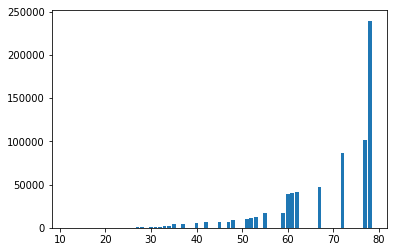

In [62]:
#More earthquakes more damage
plt.bar(total_eqs["Total EQs"], total_damage_df["Total Damage"])



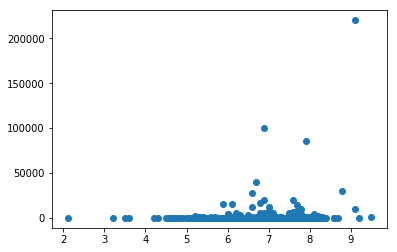

In [75]:
plt.scatter(earthquake_df["EQ_PRIMARY"], earthquake_df["TOTAL_DAMAGE_MILLIONS_DOLLARS"])

(0, 50)

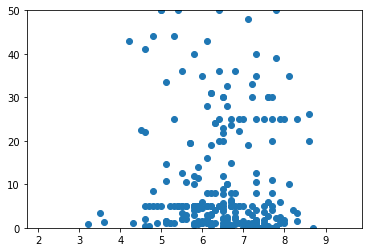

In [77]:
plt.scatter(earthquake_df["EQ_PRIMARY"], earthquake_df["TOTAL_DAMAGE_MILLIONS_DOLLARS"])
plt.ylim([0,50])

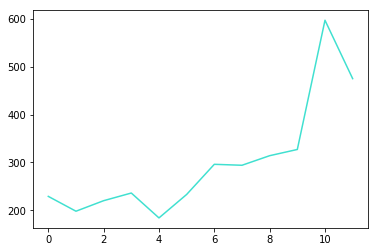

In [34]:
#graph for earthquakes by decade
newdf2=newdf1.reindex([8,10,9,6,11,7,4,5,3,2,0,1])
newdf3=newdf2.reset_index()
plt.plot(newdf3["Total Earthquakes"],color='turquoise')

In [25]:
#number of tsunamis from earthquakes 
tsunamis=earthquake_df['FLAG_TSUNAMI'].value_counts()
tsunamis

Tsu    998
Name: FLAG_TSUNAMI, dtype: int64